<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [544]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [545]:
import warnings
warnings.filterwarnings('ignore')

In [546]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
# удалили параметры подключения перед публикацией

In [547]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [548]:
# текст запроса
table = 'vacancies'
query = f'''
    SELECT
        COUNT(*)
    FROM public.{table}
'''

In [549]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [550]:
# текст запроса
table = 'employers'
query = f'''
    SELECT
        COUNT(*)
    FROM public.{table}
'''

In [551]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [552]:
# текст запроса
table = 'areas'
query = f'''
    SELECT
        COUNT(*)
    FROM public.{table}
'''

In [553]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [554]:
# текст запроса
table = 'industries'
query = f'''
    SELECT
        COUNT(*)
    FROM public.{table}
'''

In [555]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,294


***

Выводы по предварительному анализу данных

Результат предварительного анализа данных показал, что таблица вакансии содержит 49197 записи, таблица работодатели 23501, таблица регионы 1362, а таблица сферы деятельности 294.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [556]:
# текст запроса
# пятерка лидеров по количеству вакансий
query = '''
    SELECT
        a.name area,
        COUNT(v.id) cnt
    FROM areas a
    JOIN vacancies v ON a.id=v.area_id
    GROUP BY a.id
    ORDER BY COUNT(v.id) DESC
    LIMIT 5
'''

In [557]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


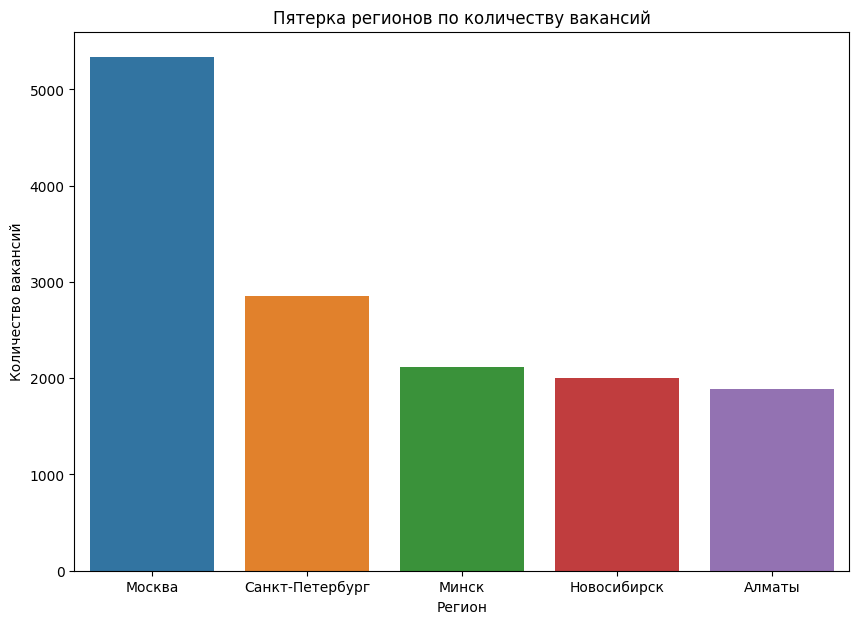

In [558]:
# нарисуем график для наглядности
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df,
    x='area',
    y='cnt',
    errorbar=None
)
barplot.set_title('Пятерка регионов по количеству вакансий')
barplot.set_xlabel('Регион')
barplot.set_ylabel('Количество вакансий');

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [559]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [560]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,24073


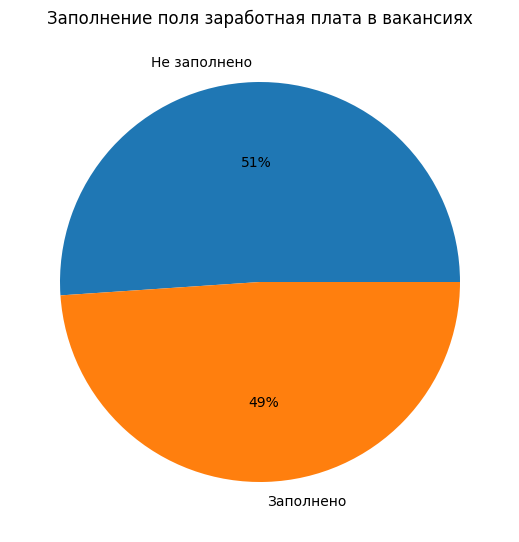

In [561]:
# нарисуем график для наглядности
query = '''
    SELECT
        'Заполнено' fill,
        COUNT(*)
    FROM vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
    UNION ALL
    SELECT
        'Не заполнено',
        COUNT(*)
    FROM vacancies
    WHERE salary_from IS NULL AND salary_to IS NULL
'''

df = pd.read_sql_query(query, connection)
#print(df)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Заполнение поля заработная плата в вакансиях')
axes.pie(
    df['count'],
    labels=['Не заполнено', 'Заполнено'],
    autopct='%.f%%'
);

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [562]:
# текст запроса
query = '''
    SELECT
        ROUND(AVG(salary_from)) avg_salary_from,
        ROUND(AVG(salary_to)) avg_salary_to
    FROM vacancies
'''

In [563]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [564]:
# текст запроса
query = '''
    SELECT
        schedule,
        employment,
        COUNT(*)
    FROM vacancies
    GROUP BY schedule, employment
    ORDER BY 3 DESC
'''

In [565]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


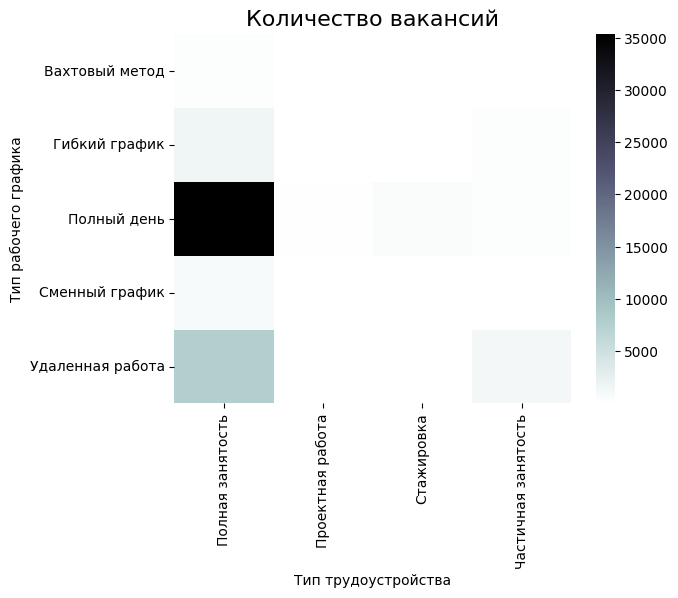

In [566]:
# нарисуем график для наглядности
df_heatmap = df.pivot('schedule', 'employment', 'count')
heatmap = sns.heatmap(data=df_heatmap, cmap='bone_r')
heatmap.set_title('Количество вакансий', fontsize=16)
heatmap.set(xlabel='Тип трудоустройства', ylabel='Тип рабочего графика');


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [567]:
# текст запроса
query = '''
    SELECT
        experience, count(id)
    FROM vacancies
    GROUP BY experience
    ORDER BY 2
'''

In [568]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


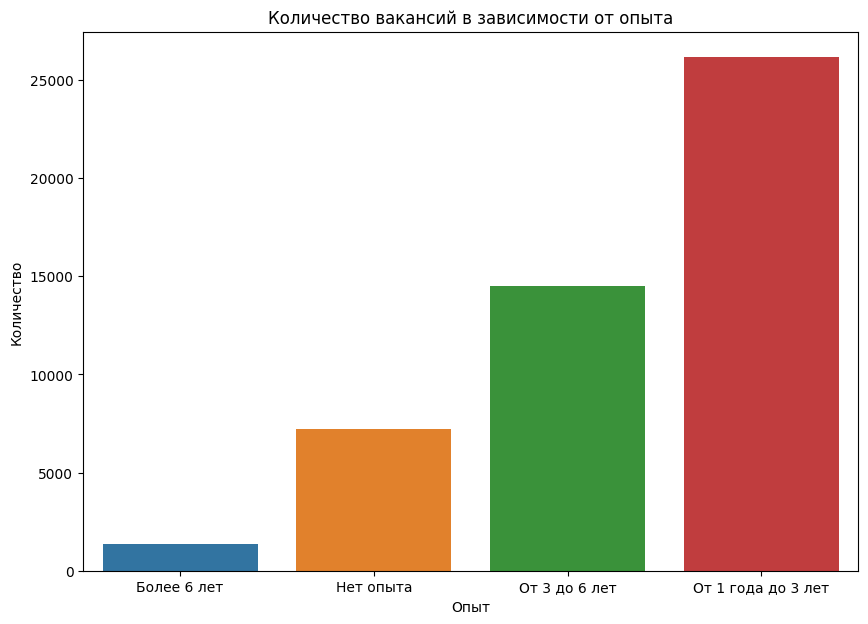

In [569]:
# нарисуем график для наглядности
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df,
    x='experience',
    y='count',
    errorbar=None
)
barplot.set_title('Количество вакансий в зависимости от опыта')
barplot.set_xlabel('Опыт')
barplot.set_ylabel('Количество');

***

Выводы по детальному анализу вакансий


- Лидерами по количеству вакансий являются крупные города, при этом самое большое количество вакансий в Москве, а в Санкт-Петербурге, который находится на втором месте, количество вакансий почти в два раза меньше.
- Число вакансий с указанной и не указанной заработной платой распределилось почти поровну, с небольшим перевесом в пользу не указания заработной платы. Возможно это вакансии в которых заработная плата будет определена по результатам собеседования, а возможно работодатель таким образом пытается увеличить количество откликов, чтобы не спугнуть кандидатов с изначально завышенными ожиданиями по уровню заработной платы.
- Среднее значение для нижней границы зарплатной вилки составляет 71 тыс. рублей, а верхнее на 56% больше и составляет 111 тыс. рублей.
- По количеству вакансий для сочетаний типа рабочего графика и типа трудоустройства наибольшей востребованностью среди работодателей пользуется сочетание "Полный день" и "Полная занятость". Остальные варианты заметно проигрывают по количеству предложений.
- Наибольшее число предложений работы приходится на потенциальных сотрудников с опытом работы от 1 года до 3-х лет. А наименьшее с опытом более 6 лет. Т.е. большинство работодателей считает достаточным опыт работы от одного года. Для работников у которых нет опыта работы и они только начинают свою трудовую деятельность не так много вариантов для трудоустройства. Вакансий по этой категории всего порядка 7 тыс.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [570]:
# текст запроса
query = '''
    -- Первое место по количеству вакансий
    (SELECT
        em.name,
        count(v.id)
    FROM employers em
    JOIN vacancies v ON em.id=v.employer_id
    GROUP BY em.id
    ORDER BY 2 DESC
    LIMIT 1)
    UNION ALL
    -- Пятое место по количеству вакансий
    (SELECT
        em.name,
        count(v.id)
    FROM employers em
    JOIN vacancies v ON em.id=v.employer_id
    GROUP BY em.id
    ORDER BY 2 DESC
    OFFSET 4
    LIMIT 1)
'''

In [571]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,name,count
0,Яндекс,1933
1,Газпром нефть,331


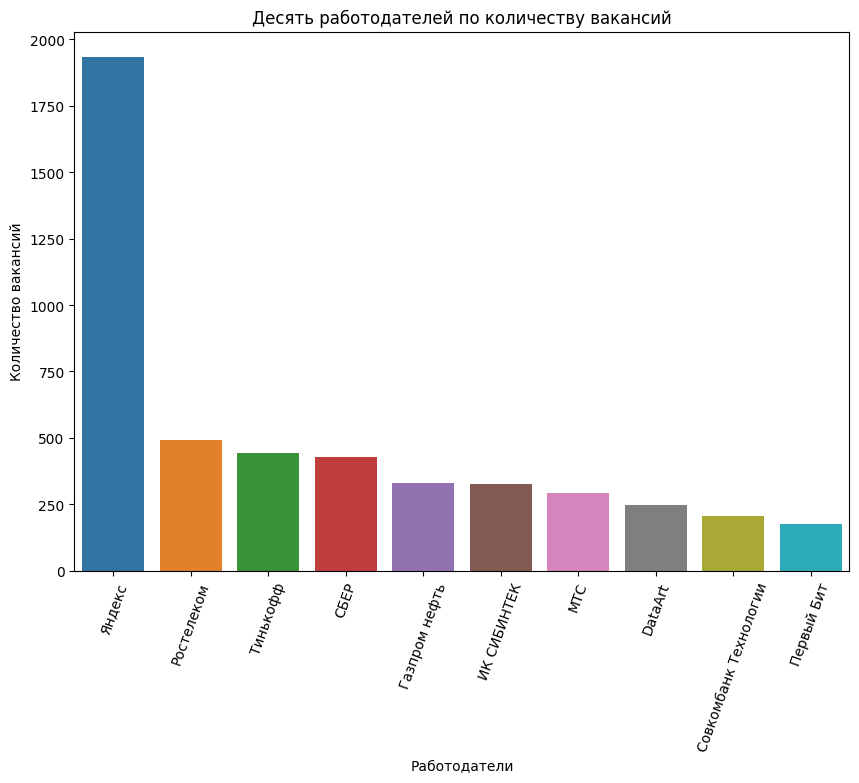

In [572]:
# нарисуем график для наглядности
# возьмем 10 работодателей по количеству вакансий
query = '''
    SELECT
        em.name,
        count(v.id)
    FROM employers em
    JOIN vacancies v ON em.id=v.employer_id
    GROUP BY em.id
    ORDER BY 2 DESC
    LIMIT 10
'''
df = pd.read_sql_query(query, connection)
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df,
    x='name',
    y='count',
    errorbar=None
)
barplot.set_title('Десять работодателей по количеству вакансий')
barplot.set_xlabel('Работодатели')
barplot.set_ylabel('Количество вакансий')
plt.xticks(rotation=70);

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [573]:
# текст запроса
query = '''
    SELECT
        a.name,
        COUNT(DISTINCT e.id) employers_count,
        COUNT(DISTINCT v.id) vacancies_count
    FROM areas a
    LEFT JOIN vacancies v ON a.id=v.area_id
    LEFT JOIN employers e ON a.id=e.area
    GROUP BY a.id
    ORDER BY 2 DESC, 3 DESC
'''

In [574]:
# результат запроса
df = pd.read_sql_query(query, connection)
df.head(10)

,name,employers_count,vacancies_count
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
5,Новосибирск,573,2006
6,Казань,480,1415
7,Нижний Новгород,426,1670
8,Россия,410,0
9,Краснодар,409,1301


In [575]:
# ответ на вопрос
query = '''
    SELECT
        a.name,
        COUNT(DISTINCT e.id) employers_count,
        COUNT(DISTINCT v.id) vacancies_count
    FROM areas a
    LEFT JOIN vacancies v ON a.id=v.area_id
    LEFT JOIN employers e ON a.id=e.area
    GROUP BY a.id
    HAVING COUNT(v.id)=0
    ORDER BY 2 DESC, 3 DESC
    LIMIT 1
'''
df = pd.read_sql_query(query, connection)
df

,name,employers_count,vacancies_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [576]:
# текст запроса
query = '''
    SELECT
        e.name,
        COUNT(DISTINCT v.area_id)
    FROM employers e 
    JOIN vacancies v ON e.id=v.employer_id
    GROUP BY e.id
    ORDER BY 2 DESC
'''

In [577]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [578]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM employers e 
    LEFT JOIN employers_industries ei ON e.id=ei.employer_id
    WHERE ei.employer_id IS NULL
'''

In [579]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [580]:
# текст запроса
query = '''
    SELECT
        e.name,
        COUNT(ei.employer_id)
    FROM employers e 
    JOIN employers_industries ei ON e.id=ei.employer_id
    GROUP BY e.id
    HAVING COUNT(ei.employer_id)=4
    ORDER BY 1
    OFFSET 2
    LIMIT 1
'''

In [581]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [582]:
# текст запроса
query = '''
    SELECT
        i.name,
        COUNT(ei.employer_id)
    FROM industries i
    JOIN employers_industries ei ON i.id=ei.industry_id
    WHERE i.name='Разработка программного обеспечения'
    GROUP BY i.id
'''

In [583]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,name,count
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [584]:
# код для получения списка городов-милионников

import requests
from bs4 import BeautifulSoup

# Адрес страницы
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

# Сюда положим список городов миллионников
m_cities = []

response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')

# Ищем таблицу со списком городов
table = page.find('table', class_='standard sortable')
# Бежим по таблице, собираем список
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        m_city = cells[1].find('a').text
        # или так
        #m_city = cells[1].find('a').get('title')
        # Добавляем найденный город
        m_cities.append(m_city)

m_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [585]:
# текст запроса
str_cities = "'" + "','".join(m_cities) + "'"
employer = 'Яндекс'
query = f'''
    -- Считаем количество вакансий Яндекса в городах миллионниках
    SELECT
        a.name,
        COUNT(v.id) cnt
    FROM areas a
    JOIN vacancies v ON a.id=v.area_id
    JOIN employers e ON v.employer_id=e.id
    WHERE
        a.name in({str_cities}) AND
        e.name='{employer}'
    GROUP BY a.id
    UNION ALL
    -- Добавляем итоговую строку
    SELECT
        'Total',
        COUNT(v.id)
    FROM areas a
    JOIN vacancies v ON a.id=v.area_id
    JOIN employers e ON v.employer_id=e.id
    WHERE
        a.name in({str_cities}) AND
        e.name='{employer}'
    ORDER BY 2
'''

In [586]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

**Выводы по анализу работодателей**  
- Компания Яндекс, предлагает наибольшее количество вакансий на рынке 1933. На втором месте идет Ростелеком, который предлагает в 4 раза меньше вакансий и далее в порядке понижения количества предлагаемых вакансий идут такие компании как: Тинькофф, СБЕР, Газпромнефть, ИК СИБИНТЕК, МТС и т.д.
- Ожидаемо, среди лидеров по количеству работодателей и вакансий идут крупные регионы. На первом месте Москва, за ней, с отставанием более, чем в два раза идет Санкт-Петербург, следом идут такие города как Минск, Алматы, Екатеринбург, Новосибирск и пр.
- Анализируя вакансии, которые размещают компании в разных регионах, можно заменить, что многие работодатели в предложении работы не ограничиваются одним регионом, а ищут сотрудников в разных городах. Так компания Яндекс ищет сотрудников в 181 регионе, Ростелеком в 152, а Спецремонт в 116.
- Так же можно заметить, что почти 8,5 тыс. работодателей, не указывают сферу деятельности. Что составляет 36% от общего числа работодателей. А интересующей нас, деятельностью "Разработка программного обеспечения", занимаются 3,5 тыс. работодателей.
- У компании Яндекс, общее количество вакансий в городах миллионниках составляет 485, наибольшее количество 54, в Москве, наименьшее 21 в Омске.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [587]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE
        LOWER(name) LIKE'%data%' OR
        LOWER(name) LIKE'%данн%'
'''

In [588]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [589]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Отбираем вакансии для специалистов уровня Junior
        (LOWER(name) LIKE'%junior%' OR
        experience='Нет опыта' OR
        employment='Стажировка')
'''

In [590]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,51


                        exp  cnt
0  Вакансии для начинающего   51
1     Вакансии для опытного  429
Всего вакансий для дата-сайентиста 480


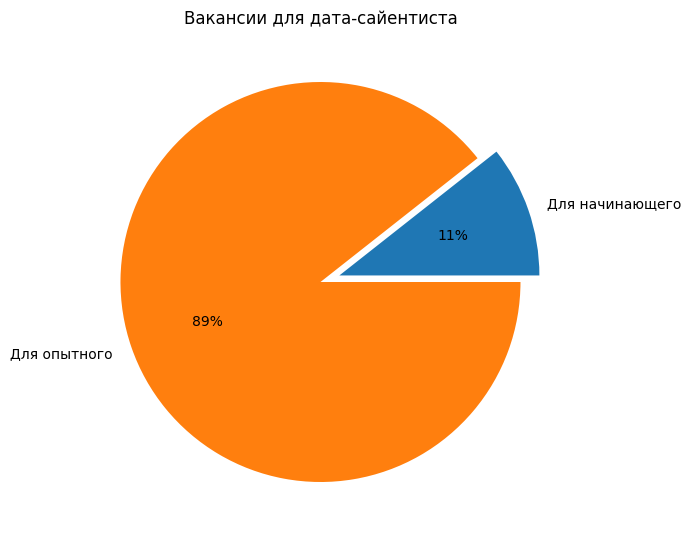

In [591]:
# нарисуем график для наглядности
query = '''
    SELECT
        'Вакансии для начинающего' exp,
        COUNT(*) cnt
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Отбираем вакансии для специалистов уровня Junior
        (LOWER(name) LIKE'%junior%' OR
        experience='Нет опыта' OR
        employment='Стажировка')
    UNION ALL
    SELECT
        'Вакансии для опытного',
        COUNT(*)
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Исключаем вакансии для специалистов уровня Junior
        NOT (LOWER(name) LIKE'%junior%' OR
        experience='Нет опыта' OR
        employment='Стажировка')
'''

df = pd.read_sql_query(query, connection)
print(df)
print('Всего вакансий для дата-сайентиста', df['cnt'].sum())
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Вакансии для дата-сайентиста')
axes.pie(
    df['cnt'],
    labels=['Для начинающего', 'Для опытного'],
    autopct='%.f%%',
    explode = [0.1, 0]
);

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [592]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Отбираем необходимые ключевые навыки
        (key_skills LIKE'%SQL%' OR
        key_skills LIKE'%postgres%')
'''

In [593]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [594]:
# текст запроса
query = '''
    SELECT
        COUNT(*)
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Отбираем Python в качестве ключевого навыка
        key_skills LIKE'%Python%'
'''

In [595]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [596]:
# текст запроса
query = '''
    SELECT
        -- Расчитываем среднее число ключевых навыков
        ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1), 2)
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Исключаем вакансии, в которых ключевые навыки не указаны
        key_skills IS NOT NULL
'''

In [597]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [598]:
# текст запроса
query = '''
    SELECT
        experience,
        -- Расчитываем среднюю зар. плату
        ROUND(AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2)) avg_salary
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Исключаем вакансии в которых заработная плата не указана
        (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
'''

In [599]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


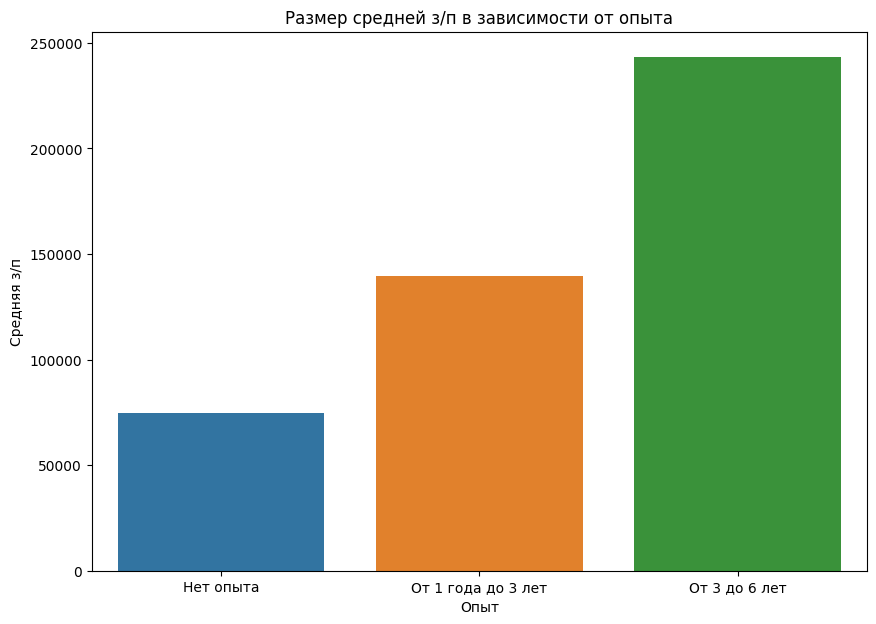

In [600]:
# Нарисуем график для наглядности
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df,
    x='experience',
    y='avg_salary',
    errorbar=None
)
barplot.set_title('Размер средней з/п в зависимости от опыта')
barplot.set_xlabel('Опыт')
barplot.set_ylabel('Средняя з/п');

***

**Выводы по предметному анализу**  
- В анализируемых нами вакансиях, к данным имеет отношение 1771 вакансия. При этом вакансий подходящих для дата-сайнтиста 480, что составляет 27% от общего числа вакансий имеющих отношение к данным. А из общего числа вакансий подходящих для дата-сайентиста только 11% вакансий подходят для начинающего. Что говорит о том, что работодатели осторожно подбирают специалистов этой профессии и часто не готовы брать специалистов без опыта.
- В требованиях к дата-сайентистам, работодатели в среднем указывают наличие более 6 ключевых навыков.
При этом для дата-сайентистов, которые владеют навыками SQL или postgres в базе имеется 201 вакансия, что составляет почти половину от общего числа вакансий дата-сайентистов. А для владеющих Python 351 вакансия, что составляет 73% от общего числа вакансий дата-сайентистов. Это говорит о большой востребованности навыков работы с SQL и postrges. И практически обязательному знанию Python для соответствия требованиям работодателей.
- Дата-сайентист без опыта в среднем может расчитывать на заработную плату в 75 тыс. рублей, с опытом от 1 года до 3-х лет на заработную  плату в размере 140 тыс. рублей, а с опытом от 3-х до 6-ти лет на заработную плату в 243 тыс. рублей. Из этих данных мы видим, что дата-сайентисты с опытом "стоят" дороже и работодатели готовы доплатить за более опытных специалистов.


# Общий вывод по проекту

In [601]:
# Немного доп. исследований
# Пятерка городов лидеров по сумме средней заработной платы, для массовых вакансий
# (количество вакансий с указанной зарплатой в регионе более 500)
query = '''
    SELECT
        a.name area, -- регион
        COUNT(v.id) cnt, -- количество вакансий
        ROUND(AVG((COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from))/2)) avg_salary -- средняя заработная плата
    FROM areas a
    JOIN vacancies v ON a.id=v.area_id
    WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
    GROUP BY a.id
    HAVING COUNT(v.id)>500
    ORDER BY 3 DESC
    LIMIT 5
'''

In [602]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,area,cnt,avg_salary
0,Москва,1592,134140.0
1,Новосибирск,929,107777.0
2,Санкт-Петербург,1203,104410.0
3,Нижний Новгород,680,96059.0
4,Ростов-на-Дону,612,94065.0


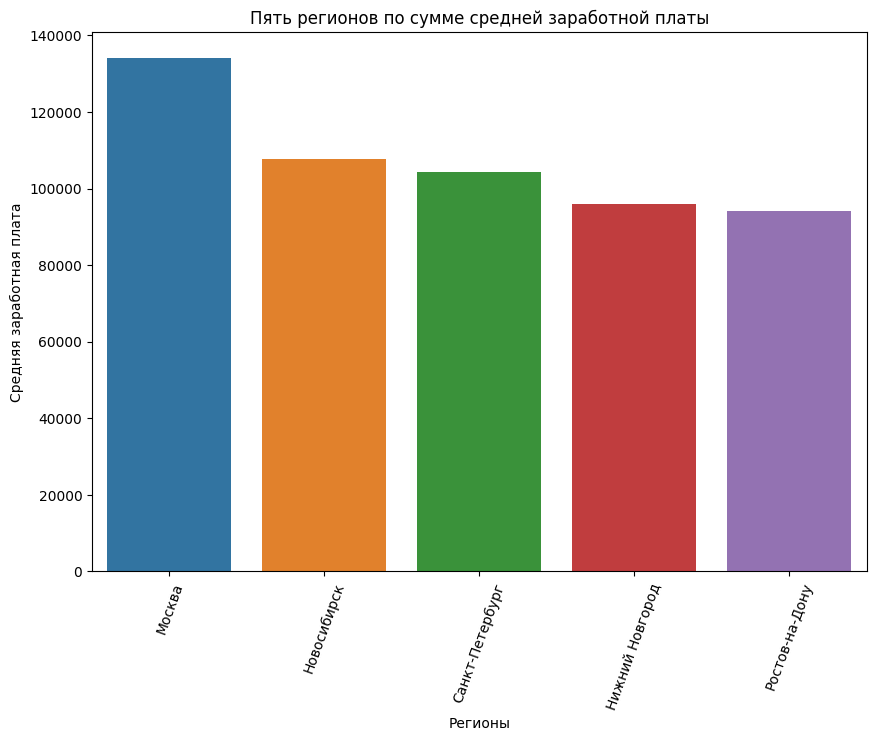

In [603]:
# График для наглядности
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df,
    x='area',
    y='avg_salary',
    errorbar=None
)
barplot.set_title('Пять регионов по сумме средней заработной платы')
barplot.set_xlabel('Регионы')
barplot.set_ylabel('Средняя заработная плата')
plt.xticks(rotation=70);

In [604]:
# Насколько редкая профессия дата-сайентист?
query = '''
    SELECT
        'Для дата-сайентиста' profession,
        COUNT(*) cnt
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%'
    UNION ALL
    SELECT
        'Прочие вакансии',
        COUNT(*)
    FROM vacancies
    WHERE
        -- Исключаем вакансии для дата-сайентистов
        NOT ((LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%')
'''


In [605]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

,profession,cnt
0,Для дата-сайентиста,480
1,Прочие вакансии,48717


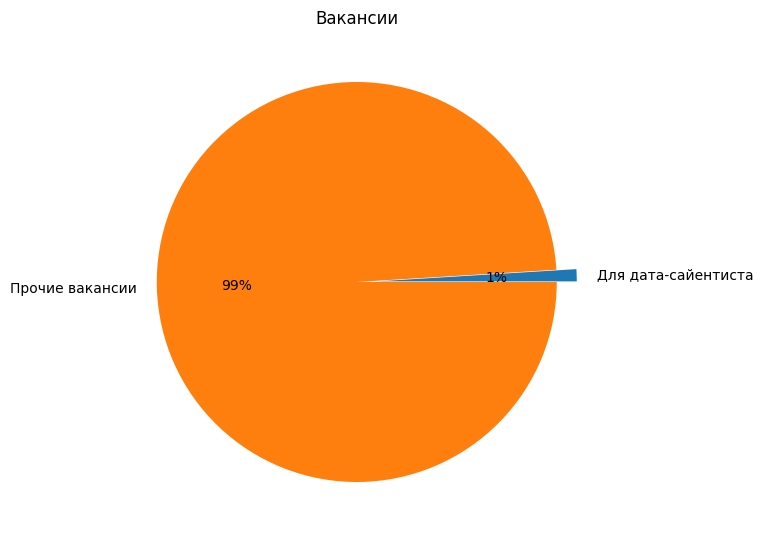

In [606]:
# график для наглядности
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Вакансии')
axes.pie(
    df['cnt'],
    labels=df['profession'],
    autopct='%.f%%',
    explode = [0.1, 0]
);

In [607]:
# посмотрим насколько средняя заработная плата по вакансиям дата-сайентистов отличается от прочих вакансий
# средняя зарплата дата-сайентистов
query = '''
    SELECT
        experience,
        -- Расчитываем среднюю зар. плату
        ROUND(AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2)) avg_salary
    FROM vacancies
    WHERE
        -- Отбираем вакансии для дата-сайентистов
        (LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%' AND
        -- Исключаем вакансии в которых заработная плата не указана
        (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
    ORDER BY 2
'''
df_ds = pd.read_sql_query(query, connection)
#df_ds

In [608]:
# средняя зарплата по прочим вакансиям
query = '''
    SELECT
        experience,
        -- Расчитываем среднюю зар. плату
        ROUND(AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2)) avg_salary
    FROM vacancies
    WHERE
        -- Исключаем вакансии для дата-сайентистов
        NOT ((LOWER(name) LIKE'%data scientist%' OR
        LOWER(name) LIKE'%data science%' OR
        LOWER(name) LIKE'%исследователь данных%' OR
        name LIKE'%ML%' OR
        LOWER(name) LIKE'%machine learning%' OR
        LOWER(name) LIKE'%машинн%обучен%') AND
        -- Исключаем вакансии по HTML
        name NOT LIKE'%HTML%') AND
        -- Исключаем вакансии в которых заработная плата не указана
        (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
    ORDER BY 2
'''
df_other = pd.read_sql_query(query, connection)
#df_other

In [609]:
# Объединим таблицы со средними зарплатами
df = df_other.merge(df_ds,
                    how='left', 
                    left_on=['experience'], 
                    right_on=['experience'],
                    suffixes=('_other', '_DS')
                    )
# Наведем красоту
df = df.fillna(0)
df.index = df['experience']
df = df.drop(['experience'], axis=1)
df['Остальные вакансии'] = df['avg_salary_other']
df['Вакансии DS'] = df['avg_salary_DS']
df = df.drop(['avg_salary_other'], axis=1)
df = df.drop(['avg_salary_DS'], axis=1)
df

,Остальные вакансии,Вакансии DS
experience,,
Нет опыта,40425.0,74643.0
От 1 года до 3 лет,76403.0,139675.0
От 3 до 6 лет,132683.0,243115.0
Более 6 лет,166256.0,0.0


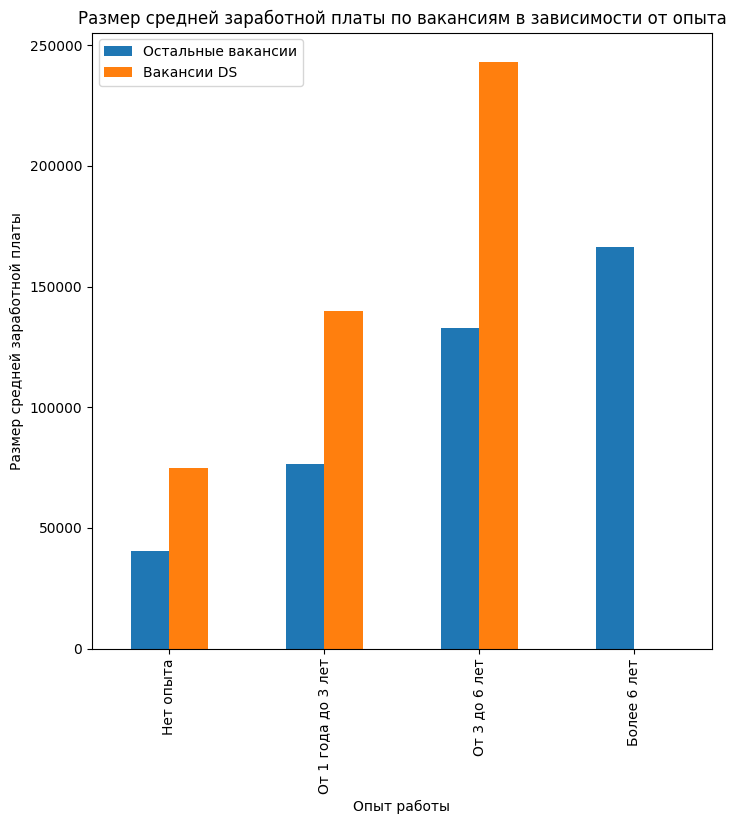

In [610]:
# График для нагладности
fig, axes = plt.subplots(figsize=(8, 8))
df.plot(kind='bar', ax=axes)
axes.set_title('Размер средней заработной платы по вакансиям в зависимости от опыта')
axes.set_xlabel('Опыт работы')
axes.set_ylabel('Размер средней заработной платы');

In [611]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

**Общий вывод по проекту.**  
- Больше всего работодатели предлагают вакансий с полной занятостью на полный рабочий день, второе место со значительным отставанием занимают вакансии с полной занятость и удалённым режимом работы.
- Лидерами по количеству вакансий являются крупные города (Москва, Санк-Петербург, Новосибирск...). Ожидаемо и попадание этих городов в лидеры по размеру средней заработной платы. Так в Москве средняя заработная плата составляет 134 тыс. руб., в Новосибирске 108 тыс. рублей, а в Санкт-Петербурге 104 тыс. рублей.
- Примерно половина работодателей не заполняет в предлагаемых вакансиях поле заработная плата, что затрудняет для соискателей возможность подобрать вакансию по своим зарплатным ожиданиям.
- Учитывая, что мы учимся по специальности Data Science, интересно посмотреть насколько редкой является эта вакансия.  
Из графика мы видим, что вакансий по специальности Data Science всего 1% от общего числа вакансий. Да, это очень редкая профессия.
- А сейчас давайте посмотрим, на какую заработную плату может расчитывать специалист по Data Science в сравнении с остальными вакансиями.  
Из графика наглядно видно, что по вакансиям Data Science работодатели готовы платить значительно выше. Что подтверждает востребованность профессии Data Science и высокую "стоимость" данных специалистов на рынке труда.

In [612]:
#connection.close()